In [ ]:
#Instalación de Paquetes (Activar solo si es necesario)
#!pip install pykalman
#!pip install qq-training-wheels auquan_toolbox --upgrade
#!pip install yfinance

In [ ]:
#Importación de Modulos
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
from scipy import poly1d
from datetime import datetime
import datetime
import os
import yfinance as yahooFinance
import matplotlib.pyplot as plt
%matplotlib inline

# Sección nueva

# Sección nueva

In [ ]:
#Configuraciones Iniciales de sistema y gráficos
os.chdir("C:/Users/Usuario/Dropbox/Mexico_001_CodigoPython")   #cambiar a la propia
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10,7)

# Sección nueva

In [ ]:
#importación de datos
query6 = pd.read_csv("Query6_1632577605171.csv")
query7 = pd.read_csv("Query7_1632567920547.csv")
query7.drop('Date',inplace=True, axis=1)
query6y7 = pd.concat([query6, query7], axis=1)
query6y7.head()
query6y7.describe()

,Mexican Bonos 10 Years Spot Yield,Mexican Bonos 1 Day Spot Yield,Mexican Bonos 1 Week Spot Yield,Mexican Bonos 2 Weeks Spot Yield,Mexican Bonos 1 Month Spot Yield,Mexican Bonos 2 Months Spot Yield,Mexican Bonos 3 Months Spot Yield,Mexican Bonos 4 Months Spot Yield,Mexican Bonos 5 Months Spot Yield,Mexican Bonos 6 Months Spot Yield,...,Mexican TIIE Spot Fwd 1 Week Term Yield,Mexican TIIE Spot Fwd 2 Weeks Term Yield,Mexican TIIE Spot Fwd 1 Month Term Yield,Mexican TIIE Spot Fwd 2 Months Term Yield,Mexican TIIE Spot Fwd 3 Months Term Yield,Mexican TIIE Spot Fwd 4 Months Term Yield,Mexican TIIE Spot Fwd 5 Months Term Yield,Mexican TIIE Spot Fwd 6 Months Term Yield,Mexican TIIE Spot Fwd 9 Months Term Yield,Mexican TIIE Spot Fwd 1 Year Term Yield
count,1864.000000,0.0,0.0,0.0,1864.000000,0.0,1864.000000,0.0,0.0,1864.000000,...,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000
mean,6.652525,NaN,NaN,NaN,4.901749,NaN,4.986151,NaN,NaN,5.067850,...,5.394284,5.392851,5.396301,5.401230,5.408059,5.415554,5.423871,5.433286,5.461255,5.484230
std,0.910290,NaN,NaN,NaN,1.849708,NaN,1.863132,NaN,NaN,1.840436,...,1.773303,1.773065,1.772546,1.770437,1.766071,1.761795,1.756369,1.747556,1.714270,1.671218
min,4.576380,NaN,NaN,NaN,0.729100,NaN,1.693540,NaN,NaN,2.917860,...,3.270900,3.269090,3.274860,3.257420,3.243530,3.239840,3.241600,3.248450,3.283240,3.315760
25%,6.123390,NaN,NaN,NaN,3.262130,NaN,3.390885,NaN,NaN,3.495713,...,4.053900,4.051280,4.064280,4.099030,4.131210,4.160460,4.186990,4.189910,4.156450,4.150020
50%,6.444875,NaN,NaN,NaN,4.317190,NaN,4.323740,NaN,NaN,4.456395,...,4.773530,4.776290,4.771500,4.762590,4.757550,4.769620,4.765820,4.765950,4.758470,4.781740
75%,7.317270,NaN,NaN,NaN,7.021490,NaN,7.113860,NaN,NaN,7.119777,...,7.368560,7.365080,7.371950,7.374030,7.374770,7.376040,7.369210,7.342410,7.219390,7.195490
max,9.446950,NaN,NaN,NaN,8.462920,NaN,8.435280,NaN,NaN,8.603340,...,8.594220,8.591630,8.597750,8.622890,8.641260,8.678660,8.713230,8.742190,8.825810,8.860590


In [ ]:
#Limpieza y filtrado de datos
queries = query6y7.fillna(method='ffill')
queries['Date'] = pd.to_datetime(queries['Date'])
fin = "2019-09-30"
queries = queries.loc[queries['Date']<= fin] 


queries = query6y7.fillna(method='ffill')
icp = np.array(queries['Mexican Bonos 1 Month Spot Yield'])
i_12 = np.array(queries['Mexican Bonos 1 Year Spot Yield'])
i_24 = np.array(queries['Mexican Bonos 2 Years Spot Yield'])
i_36 = np.array(queries['Mexican Bonos 3 Years Spot Yield'])
i_48 = np.array(queries['Mexican Bonos 4 Years Spot Yield'])
i_60 = np.array(queries['Mexican Bonos 5 Years Spot Yield'])
i_120 = np.array(queries['Mexican Bonos 10 Years Spot Yield'])
i_n = (np.array([i_12,i_24])).transpose()
i_n = (np.array([i_12,i_24,i_36,i_48,i_60,i_120])).transpose()

In [ ]:
#Estadísticas Descriptivas
type(icp)
icp = icp.astype(float)

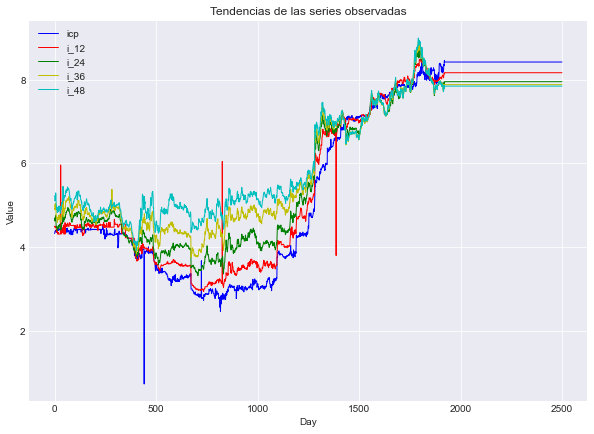

In [ ]:
#Gráficos Básicos
plt.plot(icp, 'b', lw=1)
plt.plot(i_12, 'r', lw=1)
plt.plot(i_24, 'g', lw=1)
plt.plot(i_36, 'y', lw=1)
plt.plot(i_48, 'c', lw=1)
plt.title('Tendencias de las series observadas')
plt.legend(['icp', 'i_12', 'i_24', 'i_36', 'i_48'])
plt.xlabel('Day')
plt.ylabel('Value')
plt.show()

In [ ]:
"""
Metodología
#Se elaborará un filtro de kalman a través de un proceso recursivo de estimación de
coeficientes, basado en el paper de aguilar-Argaez(2020: pp), que se basa en el paper de 
Kim & Wright (2005), el cual a su vez se basa en el paper de Kim & Orphanides (2004/2007: pp11), 
el cual proviene del paper de Duffie (2002) y Duffie & Khan (1996). 
No obstante, Kim & Orphanides (2004) no utiliza filtro de kalman. 

Página ....
formulas y procesos
1) TLP = E(TCP)+PP
"""

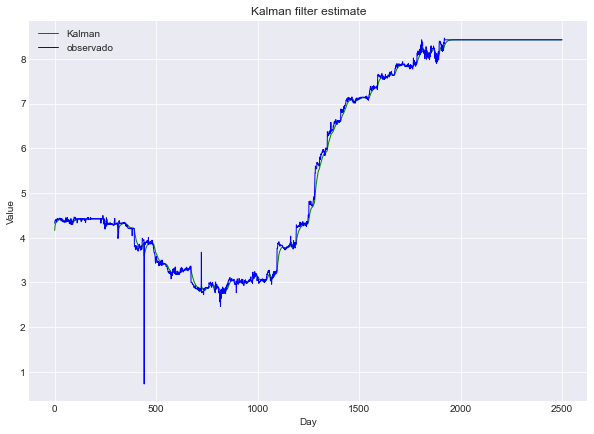

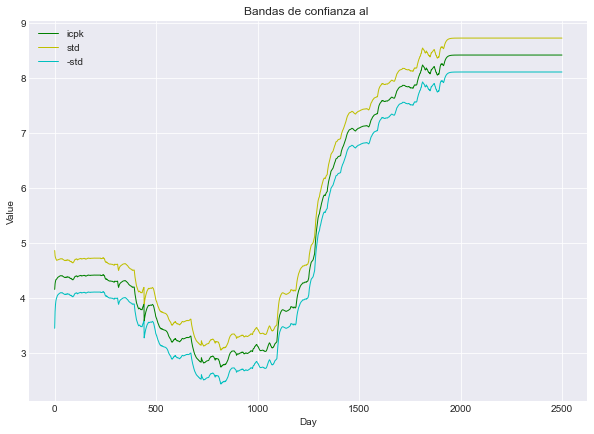

In [ ]:
#Modelo 1: Filtro de Kalman predeterminado para icp:
kf = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 4,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.01)

icpk, cov = kf.filter(icp)
icpk, std = icpk.squeeze(), np.std(cov.squeeze())
icpk.mean()
plt.title('Kalman filter estimate')
plt.plot(icpk, 'g', lw=1)
plt.plot(icp, 'b', lw=1)
plt.legend(['Kalman','observado'])
plt.xlabel('Day')
plt.ylabel('Value')
plt.show()

plt.title('Bandas de confianza al ')
plt.plot(icpk, 'g', lw=1)
plt.plot(np.sqrt(cov.squeeze())+icpk, 'y', lw=1)
plt.plot(-np.sqrt(cov.squeeze())+icpk, 'c', lw=1)
plt.legend(['icpk', 'std', '-std'])
plt.xlabel('Day')
plt.ylabel('Value')
plt.show()

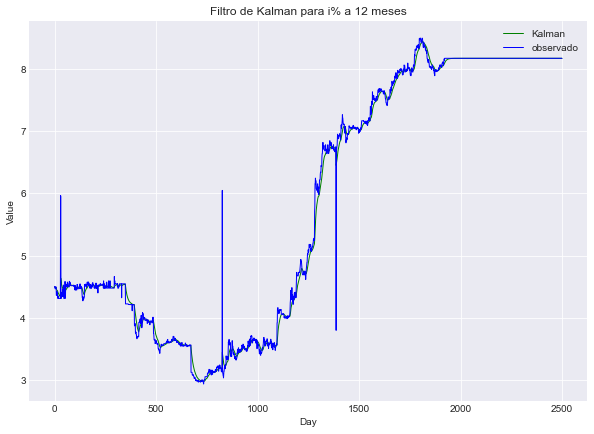

In [ ]:
#Modelo 2: Filtro de Kalman predeterminado para la tasa de interés a 12 meses.
from pykalman import KalmanFilter
kf = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = i_12[0],
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.01)
i_12k, cov = kf.filter(i_12)
i_12k, std = i_12k.squeeze(), np.std(cov.squeeze())

plt.title('Filtro de Kalman para i% a 12 meses')
plt.plot(i_12k, 'g', lw=1)
plt.plot(i_12, 'b', lw=1)
plt.legend(['Kalman','observado'])
plt.xlabel('Day')
plt.ylabel('Value')
plt.show()

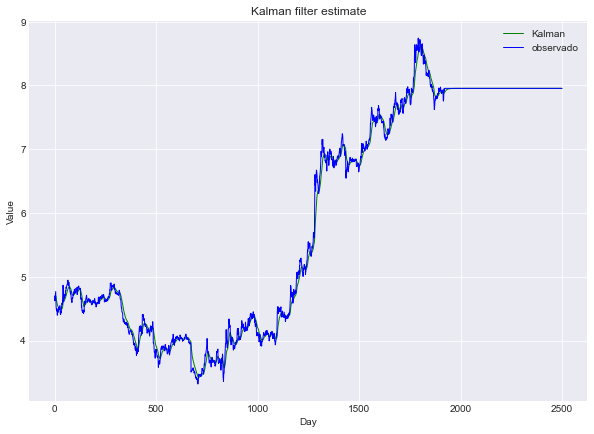

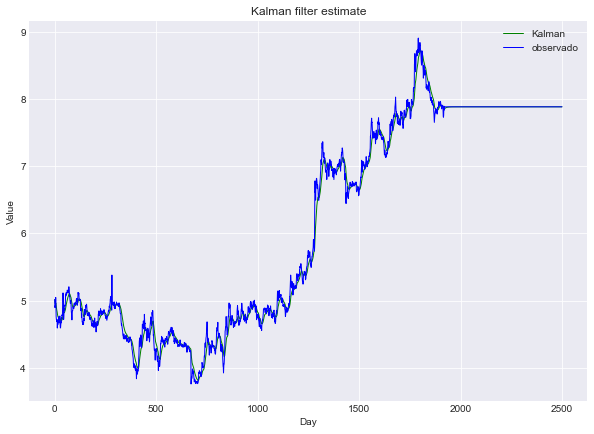

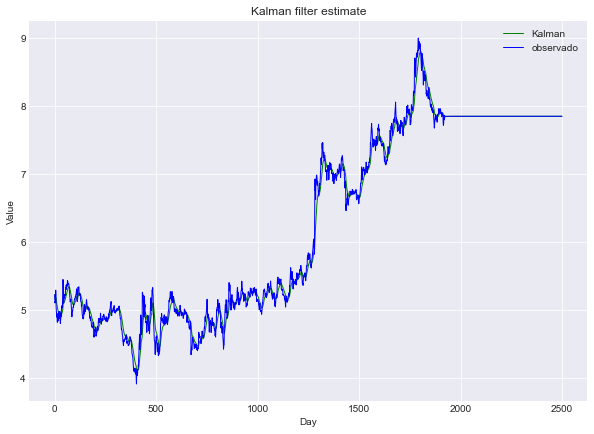

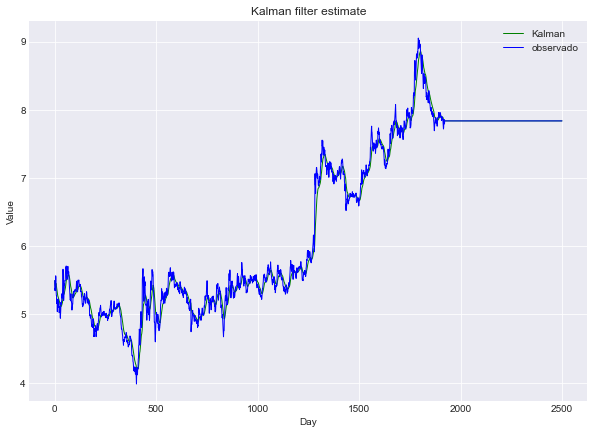

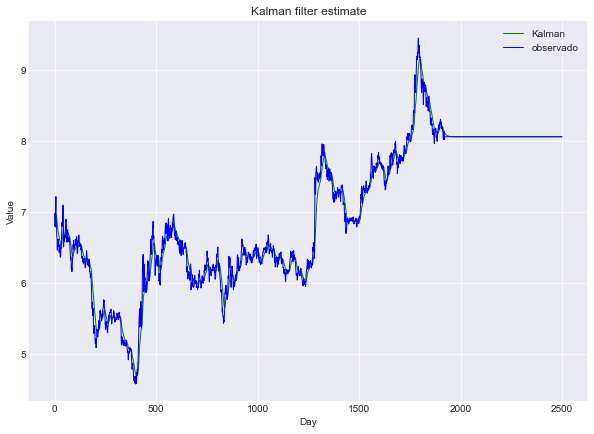

In [ ]:
#Modelo 3: Filtro de Kalman predeterminado en bucle para tasa de interés (12,24,36,48,60 y 120)
c = len(i_n[0])
n = len(i_n)
i_nk = np.full((n,1),0)
for m in range(1,c): 
    from pykalman import KalmanFilter
    i_k = []
    kf = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = i_n[0,m],
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=.01)
    i_k, cov = kf.filter(i_n[:,m])
    i_k, std = i_k.squeeze(), np.std(cov.squeeze())     
    i_k = np.reshape(i_k, (n,1))
    i_nk = np.concatenate((i_nk, i_k), axis=1)
    
    plt.plot(i_k, 'g', lw=1)
    plt.plot(i_n[:,m], 'b', lw=1)
    plt.title('Kalman filter estimate')
    plt.legend(['Kalman','observado'])
    plt.xlabel('Day')
    plt.ylabel('Value')
    plt.show()

i_nk = (pd.DataFrame(i_nk)).drop([0],axis=1)


In [1]:
#Modelo 4: Filtro de Kalman manual para las tasas de interés (12,24,36,48, 60 y 120)

#4.1) condiciones iniciales
c = len(i_n[0])
n = len(i_n)
A = np.eye(c)
B = np.array([0.01,0.01,0.01,0.01,0.01,0.01])
u = np.full((n,1),2)
xp = np.array([[0.0]*c]*n)
x = np.array([[0.0]*c]*n)
xp[0] = i_n[0]
x[0] = i_n[0]
e0 = np.full((c,1),0.01)
p0 = np.diag(np.diag(np.outer(e0,e0)))
p = p0
pp = p
z0 = np.full((c,1),0.01)
r = np.diag(np.diag(np.outer(z0,z0)))

#4.2) Estimación REcursiva con bucle
for i in range(1,n):  
    j = i - 1
    xp[i] = np.matmul(A,x[j])+B*u[i]
    pp = np.diag(np.diag(np.matmul(np.matmul(A,p),A.transpose())))   
    k = np.matmul(pp, np.linalg.inv(pp+r))
    ee = (i_n[i].transpose()-xp[i].transpose())
    p = np.matmul((np.eye(c)-k),pp)
    x[i] = xp[i]+(np.matmul(k,ee)).transpose()

#4.3) Gráfico de las variables.
cc = c - 1
for i in range(0,cc):
    j = i+1
    plt.title("Resultados para tasa de plazo:  "+str(j)+" años")
    plt.plot(queries['Date'],xp[:,i])
    plt.plot(queries['Date'],x[:,i])    
    plt.plot(queries['Date'],i_n[:,i])
    plt.legend(['proyeccion', 'kalman', 'observado'])   
    plt.show()

plt.title("Resultados para tasa de plazo 10 años")
plt.plot(queries['Date'],xp[:,cc])
plt.plot(queries['Date'],x[:,cc])
plt.plot(queries['Date'],i_n[:,cc])
plt.legend(['proyeccion', 'kalman', 'observado'])
plt.show()



NameError: ignored

In [ ]:
#5) Calculo del promedio de expectativas (en base al modelo 4)
ei = x.mean(axis=1)
ei_n = i_n.mean(axis=1)
tp = ei_n - ei

In [ ]:
#6) Simulación de montercarlo para las bandas de confianza
np.random.seed(1)

stdmc_ei = [] 
for m in range(n):
    muestra1_ei = np.random.choice(a = ei, size=10000)
    stdmc_ei.append(muestra1_ei.std()/(n**0.5))
    
lsmc_ei = ei+stdmc_ei+stdmc_ei
limc_ei = ei-stdmc_ei-stdmc_ei

In [ ]:
#7) Gráficos de verificación
plt.plot(queries['Date'],ei)
plt.show()
    
plt.plot(queries['Date'],stdmc_ei)
plt.show()

plt.plot(queries['Date'],lsmc_ei)
plt.show()

plt.plot(queries['Date'],ei)
plt.plot(queries['Date'],lsmc_ei)
plt.plot(queries['Date'],limc_ei)
plt.show()

#para la variable final
plt.title("PRima por plazo")
plt.plot(queries['Date'],tp)
plt.legend('Prima por plazo')
plt.show()

In [ ]:
#8) Empaquetado final
#empaquetado final
datos = np.concatenate((xp, x, i_n),axis=1)
datos = pd.DataFrame(datos)
datos.columns = ['proy12', 'proy24', 'proy36', 'proy48', 'proy60',
                 'proy120','kalman12','kalman24','kalman36','kalman48',
                 'kalman60','kalman120', 'obs12','obs24','obs36','obs48',
                 'obs60','ob1202']